In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 1. Write down the meta information about the “wine.csv” data file available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Wine.

In [2]:
wine_data = pd.read_csv("wine.csv")
sns.set()
wine_data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### 1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

#### 2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
#### 3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

#### 4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

#### 5. Number of Instances

      	class 1 59
        class 2 71
        class 3 48

#### 6. Number of Attributes 
	
	13

#### 7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

#### 8. Missing Attribute Values:

	None

#### 9. Class Distribution: number of instances per class

      	class 1 59
        class 2 71
        class 3 48


## 2.Tabulate and visualize the distribution of the numeric variables.

In [3]:
wine_data.info() #since all are numeric we visualize all the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [4]:
wine_data.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


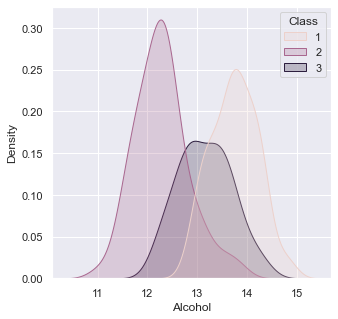

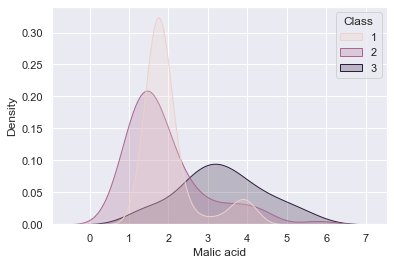

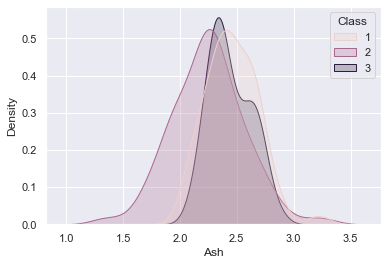

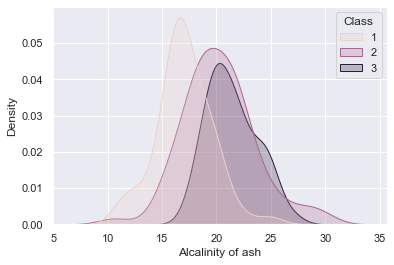

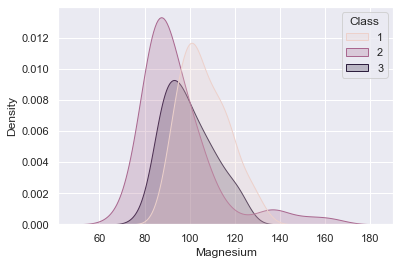

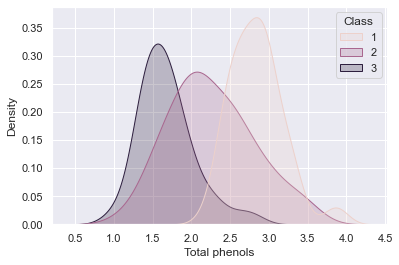

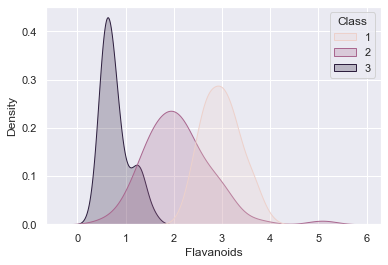

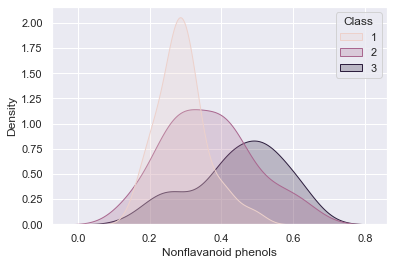

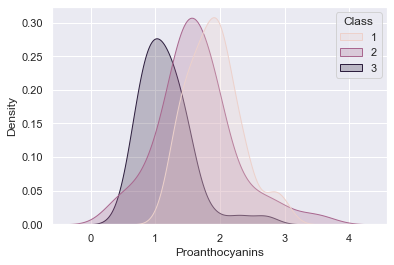

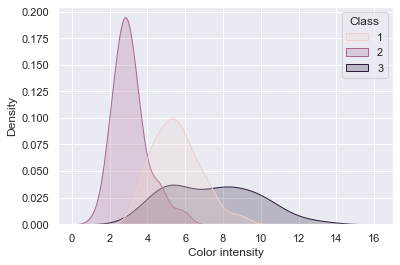

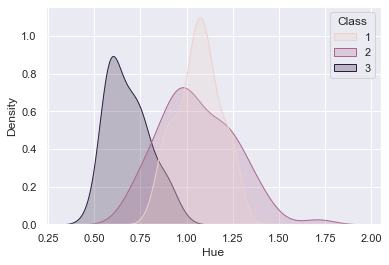

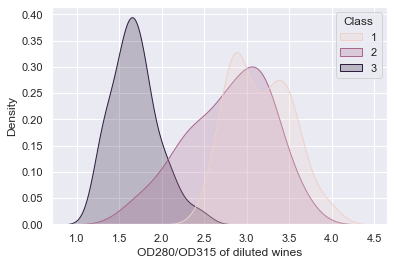

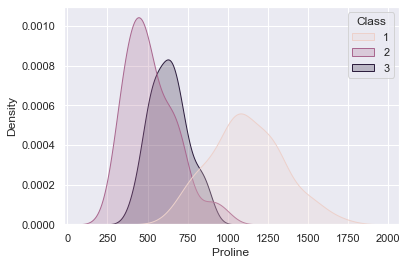

In [5]:
plt.figure(figsize=(5,5))
for column in wine_data.columns:
    if column == 'Class':
        continue
    sns.kdeplot(data=wine_data, x=column, hue='Class', shade = True)
    plt.show()

## 3. Perform  the  required  preprocessing  ,  70,30  split  and  build  a  classifier  using  the Multi-Layer  Perceptron  Classifier  model  available  in  SciKit  Learn.  Use  3  layers with  the  same  number  of  neurons  as  there  are  features  along  with  500  max iterations.

In [6]:
Y = wine_data.Class
X = wine_data.drop('Class', axis =1)

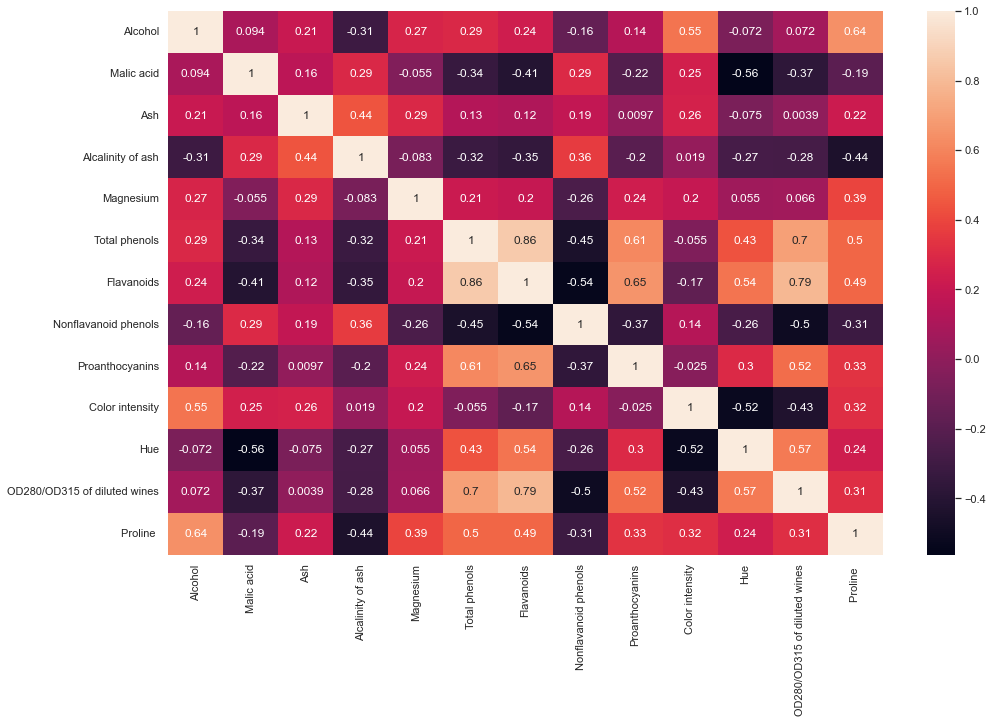

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot= True)
plt.show()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = MLPClassifier(hidden_layer_sizes = (12,12,12), max_iter = 500)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [9]:
cf_matrix = confusion_matrix(Y_pred, Y_test)
print(cf_matrix)

[[19  0  0]
 [ 0 20  0]
 [ 0  1 14]]


In [10]:
accuracy_score(Y_pred, Y_test)

0.9814814814814815

## 4. Tabulate the precision, recall and F1-score.

In [11]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## 5. Display the  MLP weights and biases after training your model.

In [12]:
weights, bias = clf.coefs_, clf.intercepts_
print("Weights = ", weights)
print("Bias = ", bias)

Weights =  [array([[-0.14654497, -0.58215568, -0.49942849, -0.13976038,  0.12347577,
        -0.51094503,  0.01447755, -0.08894575,  0.12638495,  0.32718766,
         0.00160723,  0.62867873],
       [-0.03523525,  0.25120784,  0.32375933,  0.19213023, -0.27938904,
         0.07972355, -0.43542932,  0.06545438,  0.06739664,  0.22709212,
         0.05478314, -0.03372359],
       [-0.26196007, -0.18686266, -0.40011386,  0.38420002, -0.05962021,
         0.2425021 , -0.4787554 , -0.01355934, -0.16351006,  0.16142084,
         0.08180997,  0.46533679],
       [ 0.44409377,  0.19810938,  0.40232231,  0.37972332,  0.15236951,
         0.32561303,  0.37484765,  0.40472369, -0.40854315, -0.46385622,
        -0.01359584, -0.54302126],
       [ 0.25092166,  0.01748304,  0.0754348 , -0.23729713, -0.32611774,
         0.35027319, -0.18856163,  0.17448565, -0.37082236,  0.31186188,
         0.1390671 ,  0.45771707],
       [-0.43897209,  0.01274992, -0.31361549,  0.0077    ,  0.05709733,
         0